In [2]:
%%capture
%pip install wget

In [ ]:
#下載字型
import wget
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

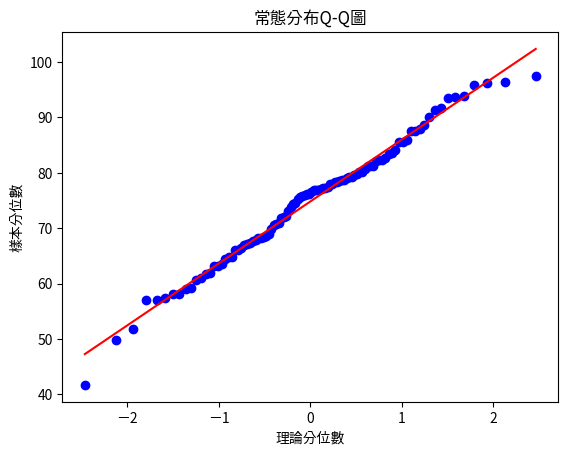

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib as mlp
from matplotlib.font_manager import fontManager

#載入中文字型
fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')

#模擬高斯分佈數據
data = np.random.normal(loc=75, scale=10, size=100)

# 繪製Q-Q圖
stats.probplot(data, dist='norm', plot=plt)
plt.xlabel('理論分位數')
plt.ylabel('樣本分位數')
plt.title('常態分布Q-Q圖')

plt.show()